In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Question 1
# Density Plot
# Create the following density 
# plot to describe how the distribution of city mileage 
# varies with respect the number of cylinders.

data = pd.read_csv("mpg.csv")

In [3]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


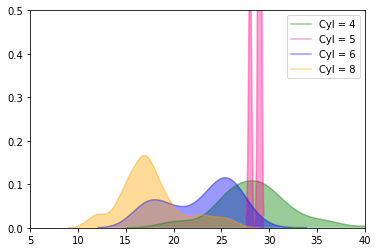

In [4]:
plt.figure()

sns.kdeplot(data.loc[data.cyl==4,"hwy"],
            shade = True, # Add shade under line
            color = "green",
            label = "Cyl = 4",
            alpha = 0.4
           )

sns.kdeplot(data.loc[data.cyl==5,"hwy"],
            shade = True, # Add shade under line
            color = "deeppink",
            label = "Cyl = 5",
            alpha = 0.4
           )
sns.kdeplot(data.loc[data.cyl==6,"hwy"],
            shade = True, # Add shade under line
            color = "blue",
            label = "Cyl = 6",
            alpha = 0.4
           )
sns.kdeplot(data.loc[data.cyl==8,"hwy"],
            shade = True, # Add shade under line
            color = "orange",
            label = "Cyl = 8",
            alpha = 0.4
           )

plt.ylim(0,0.5)
plt.xlim(5,40)
plt.legend
plt.show()

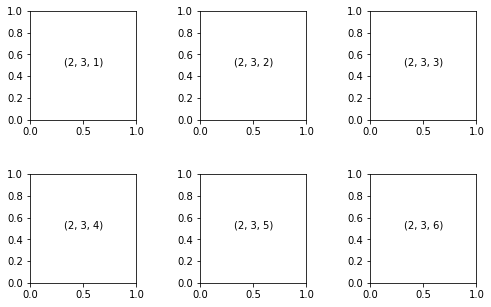

In [5]:
# Question 2
# Multiple Subplots
# Create a 2x3 grid of plots as follows:

plt.figure(figsize = (8,5))

plt.subplots_adjust(hspace = 0.5)
# height space
plt.subplots_adjust(wspace = 0.6)
# width space
for i in range(1,7):
    plt.subplot(2,3,i) # (2*3 plot, ist one)
    plt.text(0.5,0.5,str((2,3,i)),ha = "center") 
    # 0.5,0.5 is the position, str is the text
    # ha = horizontal alignment

plt.show()

<Figure size 432x288 with 0 Axes>

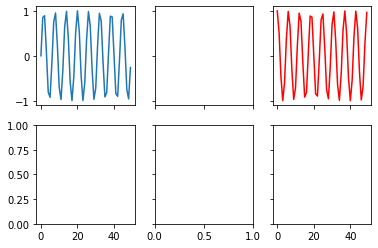

In [6]:
# Question 3
# Create a 2x3 grid of plots with sin & cos plots

plt.figure()

fig,ax = plt.subplots(2,3, sharex = 'col', sharey = 'row')
# Get the fig and ax so that we can manupulate later on (always put fig,ax here)
# Even if we're not doing anything with fig later on
# sharex = 'col' make we share x axis
# 'row': each subplot row will share an x- or y-axis.
# 'col': each subplot column will share an x- or y-axis.
# here it is subplotS, previously it was subploT
x = np.linspace(0,50)
# 生成等差数列，默认是0，50生成50个
ax[0,0].plot(np.sin(x))
ax[0,2].plot(np.cos(x),color="red") 
# ax[0,2] access to the 1st row, 3rd column of the plts

plt.show()

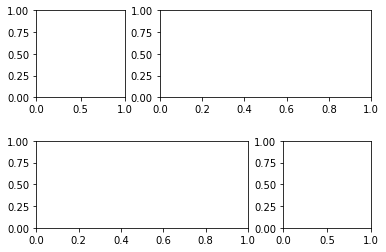

In [7]:
# Question 4
# Create the following plot:

fig = plt.figure()

grid = plt.GridSpec(2,3,wspace = 0.4, hspace = 0.5)
# 先设一个大框2*3， 接下来来subplot

fig.add_subplot(grid[0,0]) # draw a box at 0,0 position
fig.add_subplot(grid[0,1:3])
fig.add_subplot(grid[1,:2])
fig.add_subplot(grid[1,2])

plt.show()

In [8]:
# Question 5
# 5. Use the mpg.csv dataset to create the following plot that shows 
# the relationship between the variables displ and hwy. 
#  In addition, it shows the distribution of both using boxplots.

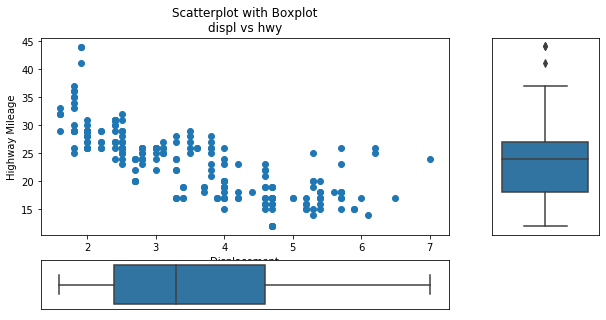

In [9]:
fig = plt.figure(figsize = (10,5))

grid = plt.GridSpec(4,4,wspace = 0.4, hspace = 0.5)
# 先设一个大框2*3， 接下来来subplot

ax_main = fig.add_subplot(grid[:3,:3]) # draw a box from row 1,2,3, column 1,2,3 (doesn't include ending)
ax_bottom = fig.add_subplot(grid[3,0:3]) # draw a box at 4th row,1,2,3 column (doesn't include ending)
ax_right = fig.add_subplot(grid[:3,3]) # draw a box at 4th column, 1,2,3 row (deosn't include ending)

# plot the mian graph (scatter plot)

ax_main.scatter(data.displ,data.hwy)
ax_main.set(ylabel = "hwy")

# plot the right boxplot

sns.boxplot(data.hwy,ax = ax_right, orient ='v')
ax_right.set(xticks = [], yticks =[],ylabel = "") # Get rid of ax_right's ticks

sns.boxplot(data.displ,ax = ax_bottom,orient = 'h')
ax_bottom.set(xticks = [], yticks =[],xlabel = "")

## Set title, x label, ylabel

ax_main.set(title = "Scatterplot with Boxplot\ndispl vs hwy", 
            ylabel = "Highway Mileage",
           xlabel = "Displacement")


plt.show()

In [10]:
# Question 6
# Plotting with different scales using secondary Y axis
# Use the economics.csv dataset to create the following plot 
# which shows the relationship between personal savings rate and # of unemployed from 1967 to 2012.

data = pd.read_csv("economics.csv")
data.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


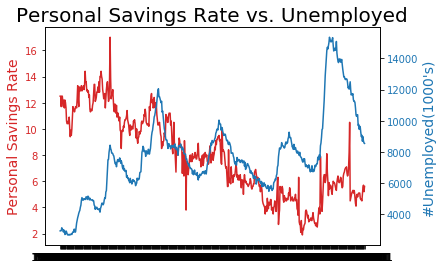

In [11]:
fig = plt.figure() #we are using fig,because we're going to refer to fig later on

plt.plot(data.date,data.psavert,color = "tab:red") # a different kind of red
ax = plt.gca()
# Get current axis (this is later used for main y axis)

## Set the main y-axis(left)
ax.tick_params(axis = 'y',labelcolor = "tab:red")
ax.set_ylabel("Personal Savings Rate",color = "tab:red",fontsize = 14)

## Set the x.axis
ax.set_xticks(np.arange(0,len(data.date),60))
## Model x axis is every 5 years, the date is shown in month, so 5 years = 60 mons

## Set the secondary y-axis (right)
ax.right = ax.twinx() ### create a twin y axis that share the same x axis
ax.right.plot(data.date, data.unemploy, color = "tab:blue")
ax.right.tick_params(axis = 'y',labelcolor = "tab:blue")
ax.right.set_ylabel("#Unemployed(1000's)",color = "tab:blue", fontsize = 14)

plt.title("Personal Savings Rate vs. Unemployed",fontsize = 20)

plt.show()